In [1]:
import numpy as np
from scipy.misc import imresize
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import transform, filters
import sys, pylab, operator, csv
#import util
import os
import urllib

%matplotlib notebook

%load_ext autoreload
%autoreload 2

import caffe

from helpers import *
from heatmaps import *
#from repro_EB_figs import *
from optimize_mask import *

In [2]:
gpu = 0
net_type = 'googlenet'

In [3]:
caffe.set_device(gpu)
caffe.set_mode_gpu()

net = get_net(net_type)

# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(1, 3, 224, 224)
conv1/7x7_s2	(10, 64, 112, 112)
pool1/3x3_s2	(10, 64, 56, 56)
pool1/norm1	(10, 64, 56, 56)
conv2/3x3_reduce	(10, 64, 56, 56)
conv2/3x3	(10, 192, 56, 56)
conv2/norm2	(10, 192, 56, 56)
pool2/3x3_s2	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_0	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_1	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_2	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_3	(10, 192, 28, 28)
inception_3a/1x1	(10, 64, 28, 28)
inception_3a/3x3_reduce	(10, 96, 28, 28)
inception_3a/3x3	(10, 128, 28, 28)
inception_3a/5x5_reduce	(10, 16, 28, 28)
inception_3a/5x5	(10, 32, 28, 28)
inception_3a/pool	(10, 192, 28, 28)
inception_3a/pool_proj	(10, 32, 28, 28)
inception_3a/output	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_0	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_1	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_2	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_spl

In [4]:
labels_desc = np.loadtxt('/home/ruthfong/packages/caffe/data/ilsvrc12/synset_words.txt', str, delimiter='\t')
(paths, labels) = read_imdb('/home/ruthfong/packages/caffe/data/ilsvrc12/annotated_train_heldout_imdb.txt')
paths = np.array(paths)
labels = np.array(labels)
data_desc = 'train_heldout'

<IPython.core.display.Javascript object>


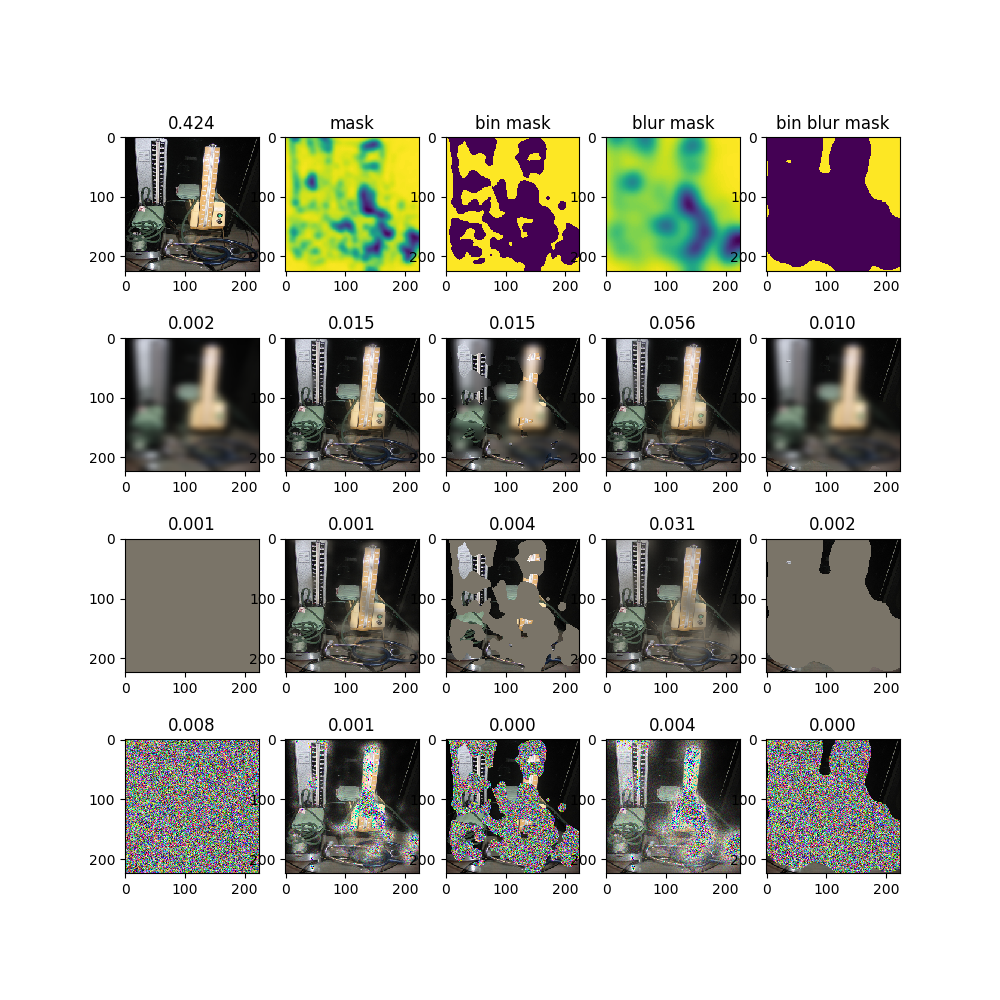

<IPython.core.display.Javascript object>


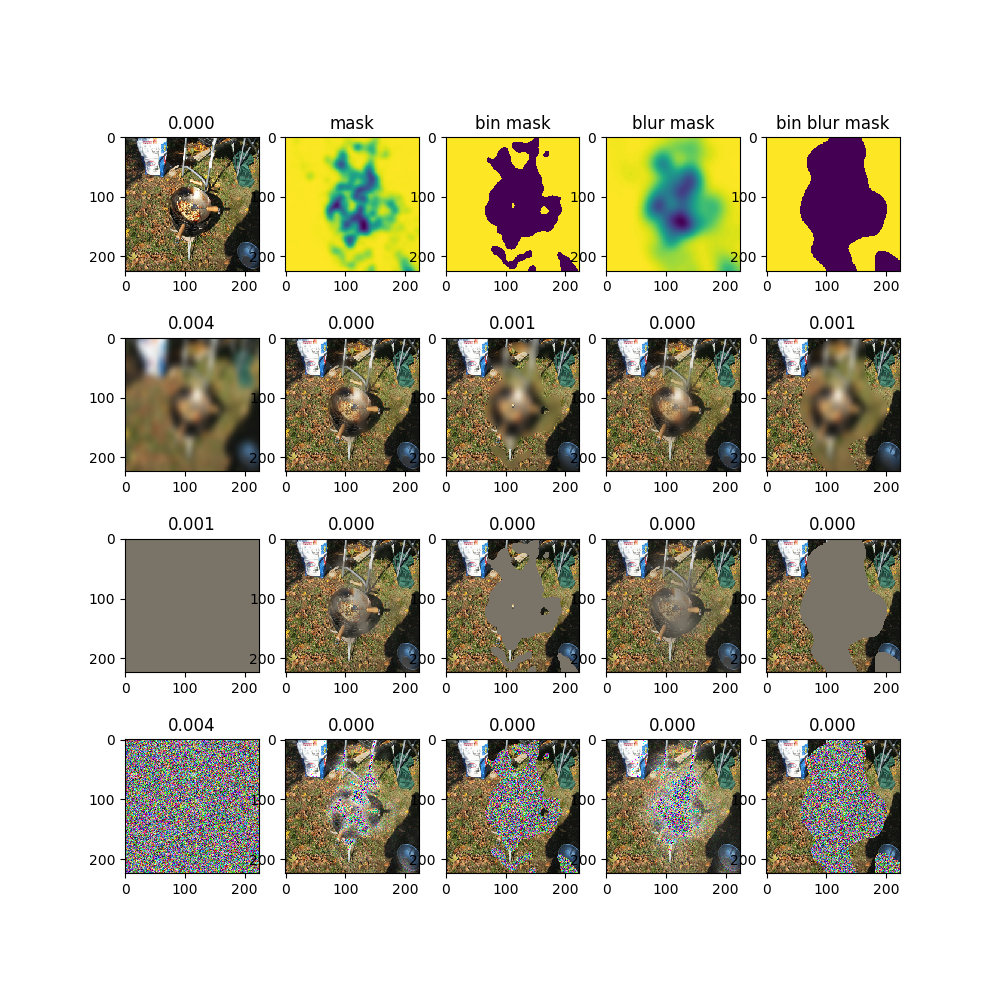

<IPython.core.display.Javascript object>


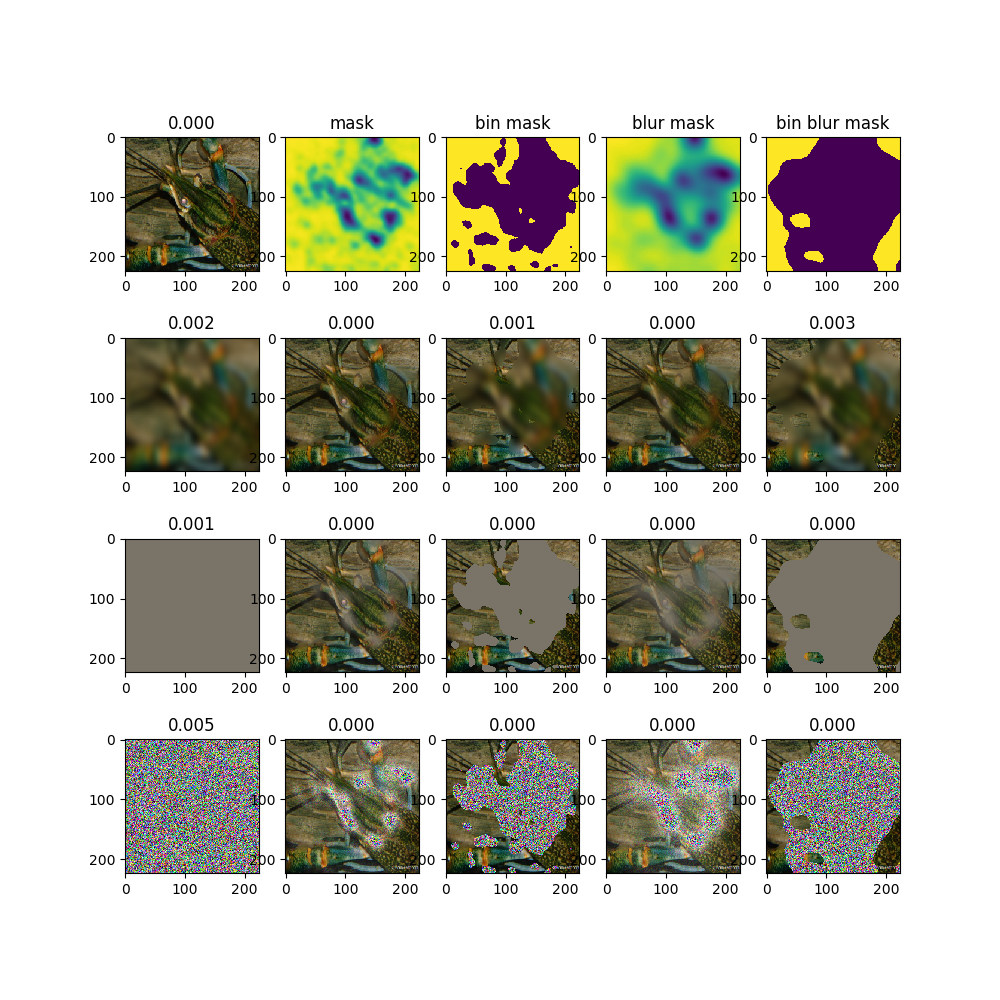

<IPython.core.display.Javascript object>


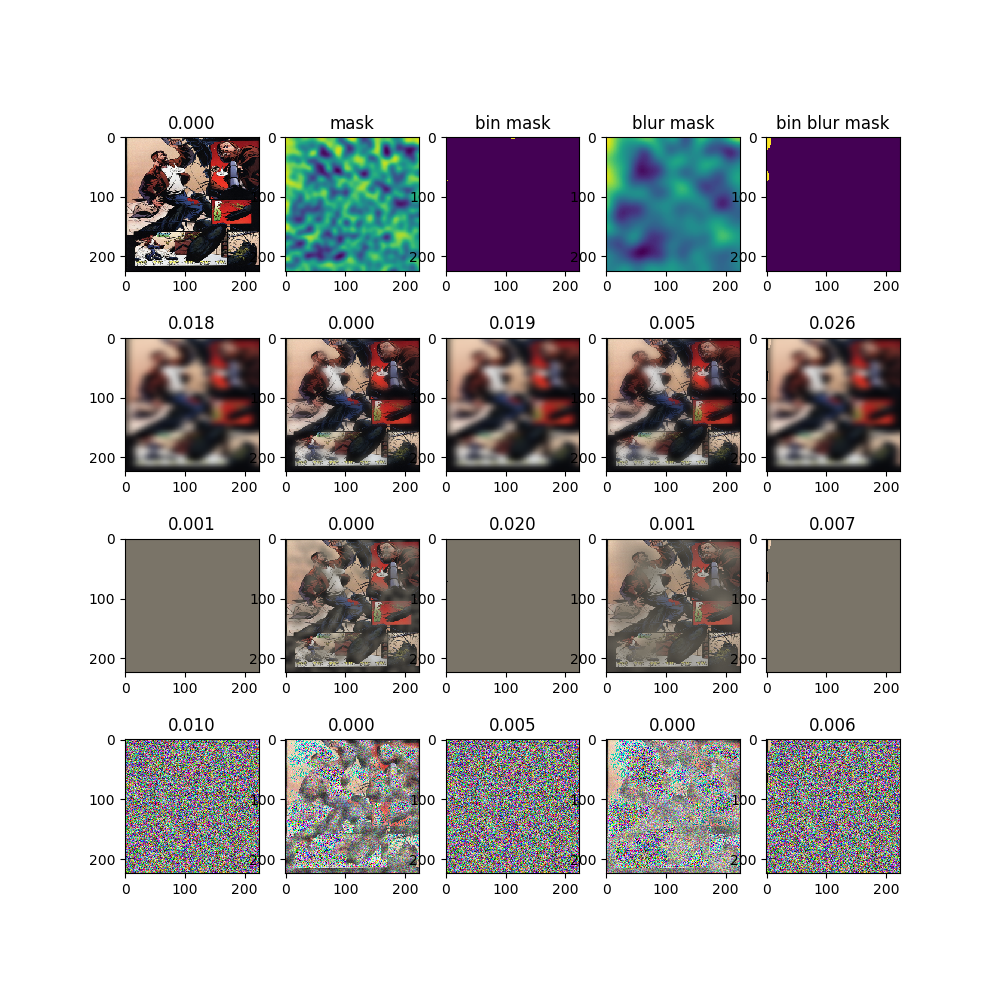

<IPython.core.display.Javascript object>


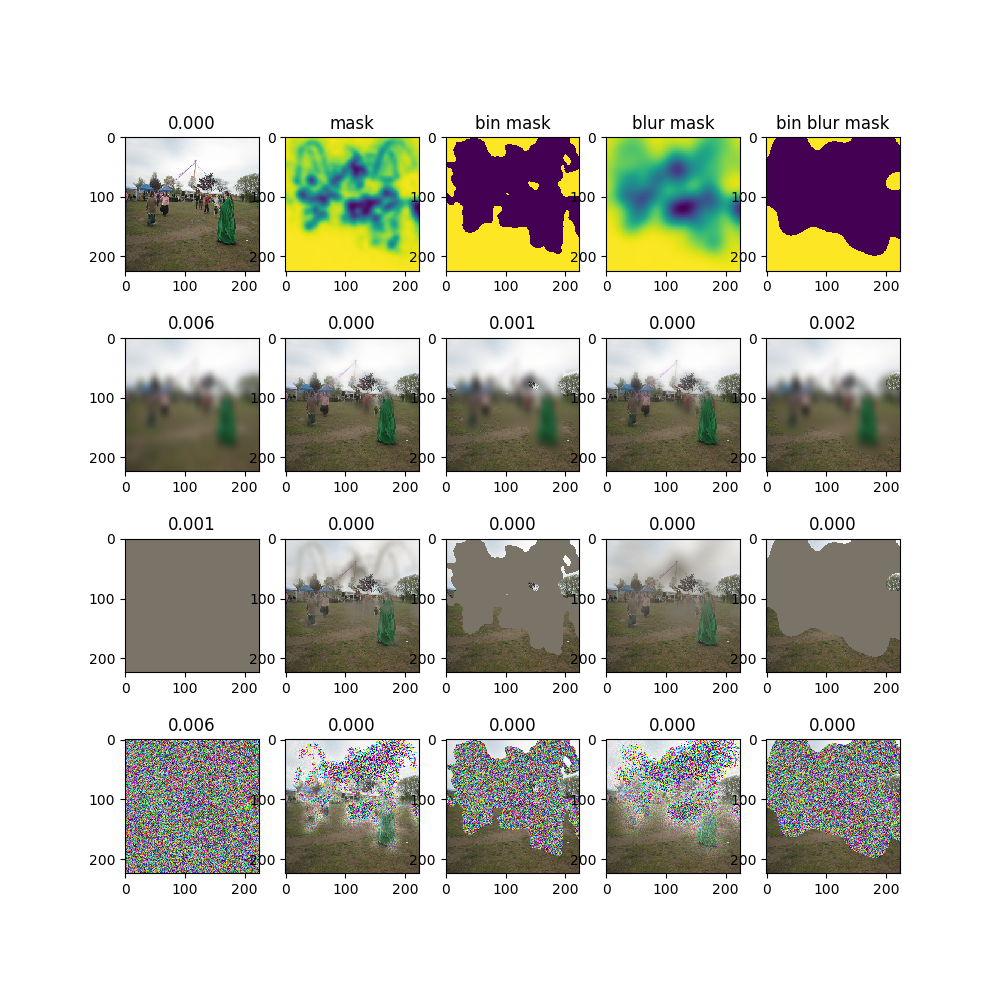

<IPython.core.display.Javascript object>


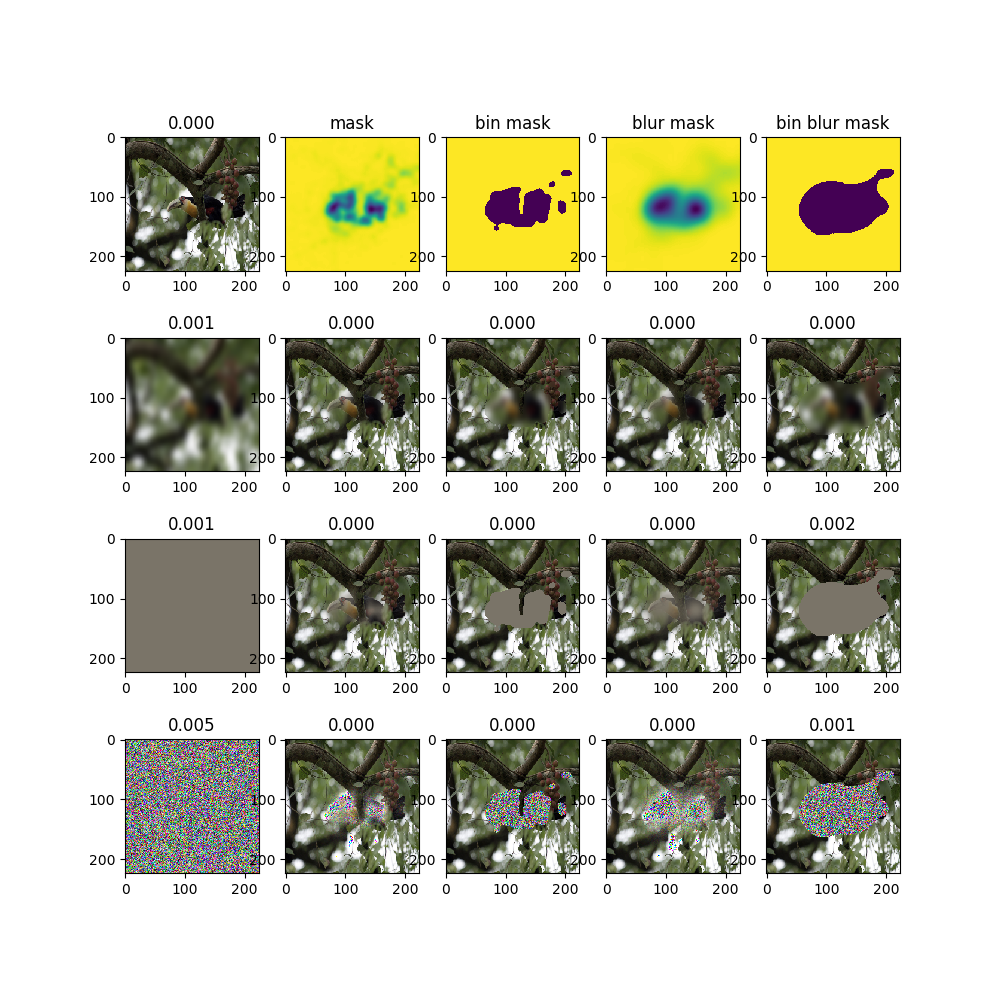

<IPython.core.display.Javascript object>


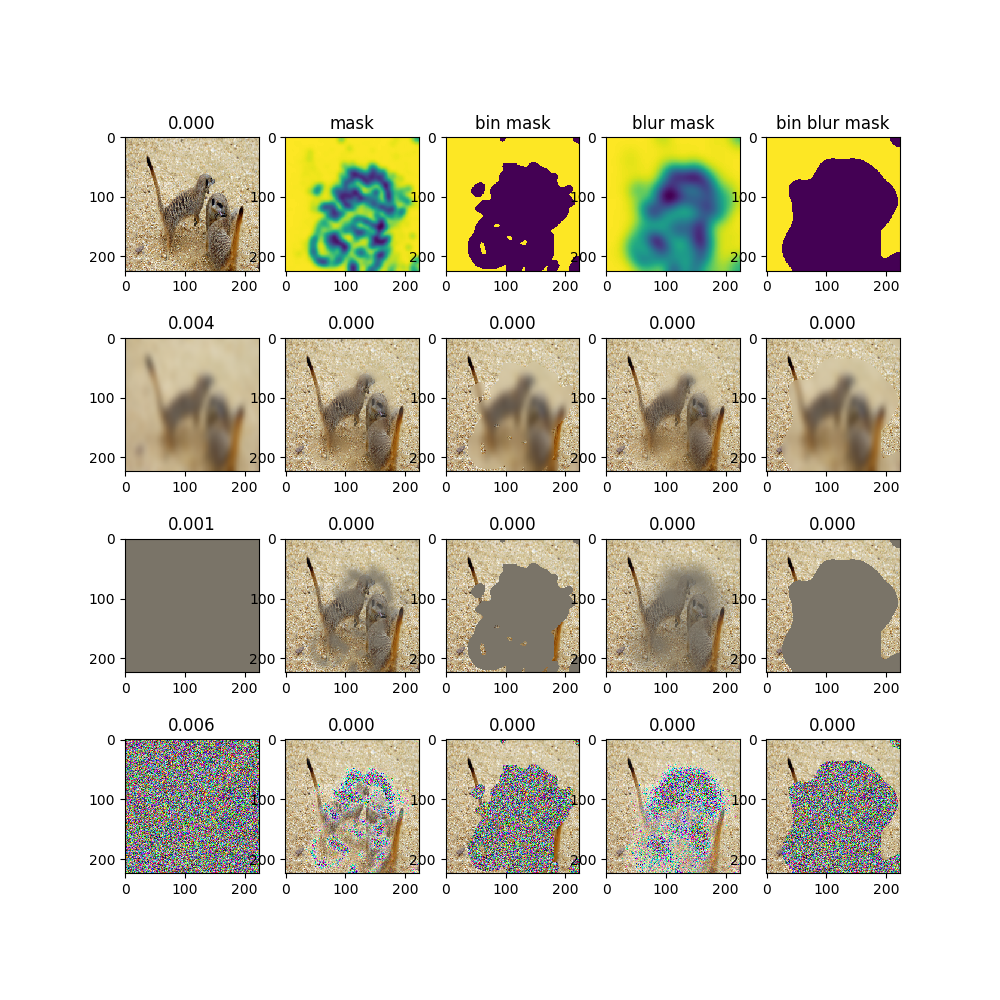

<IPython.core.display.Javascript object>


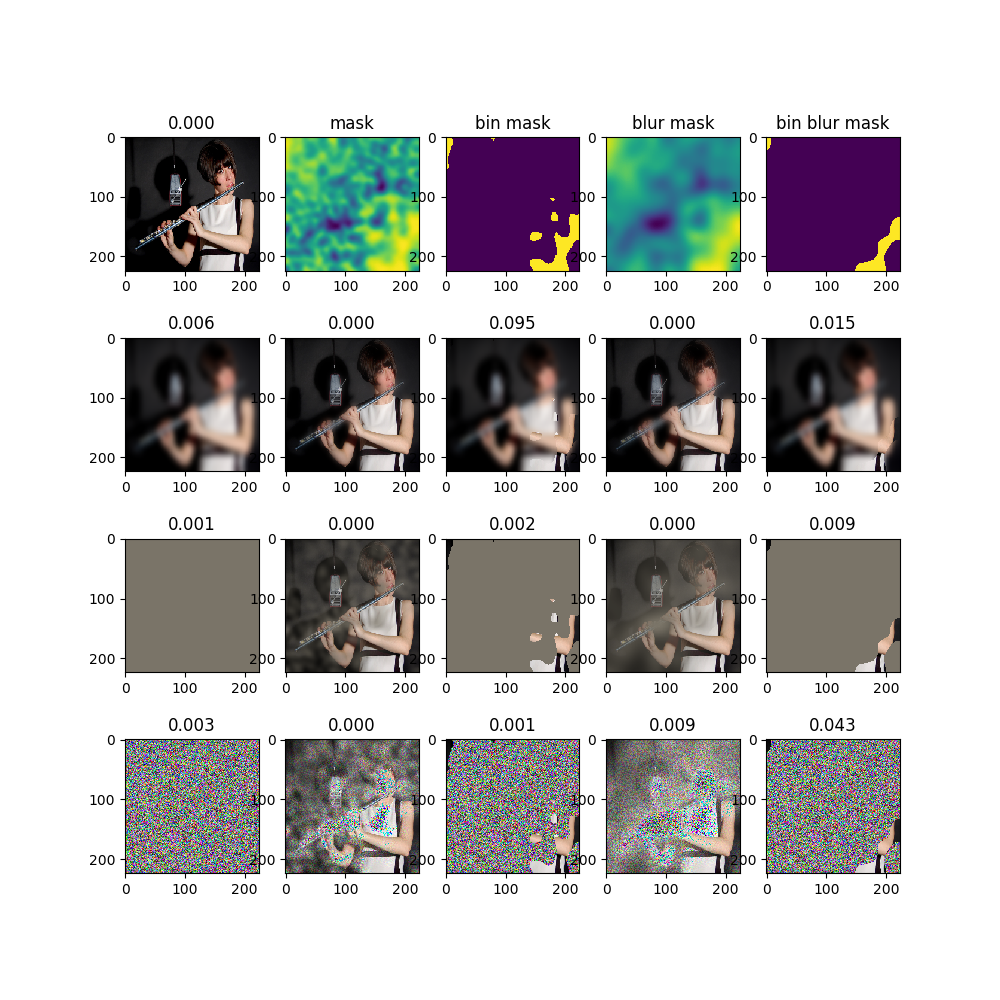

<IPython.core.display.Javascript object>


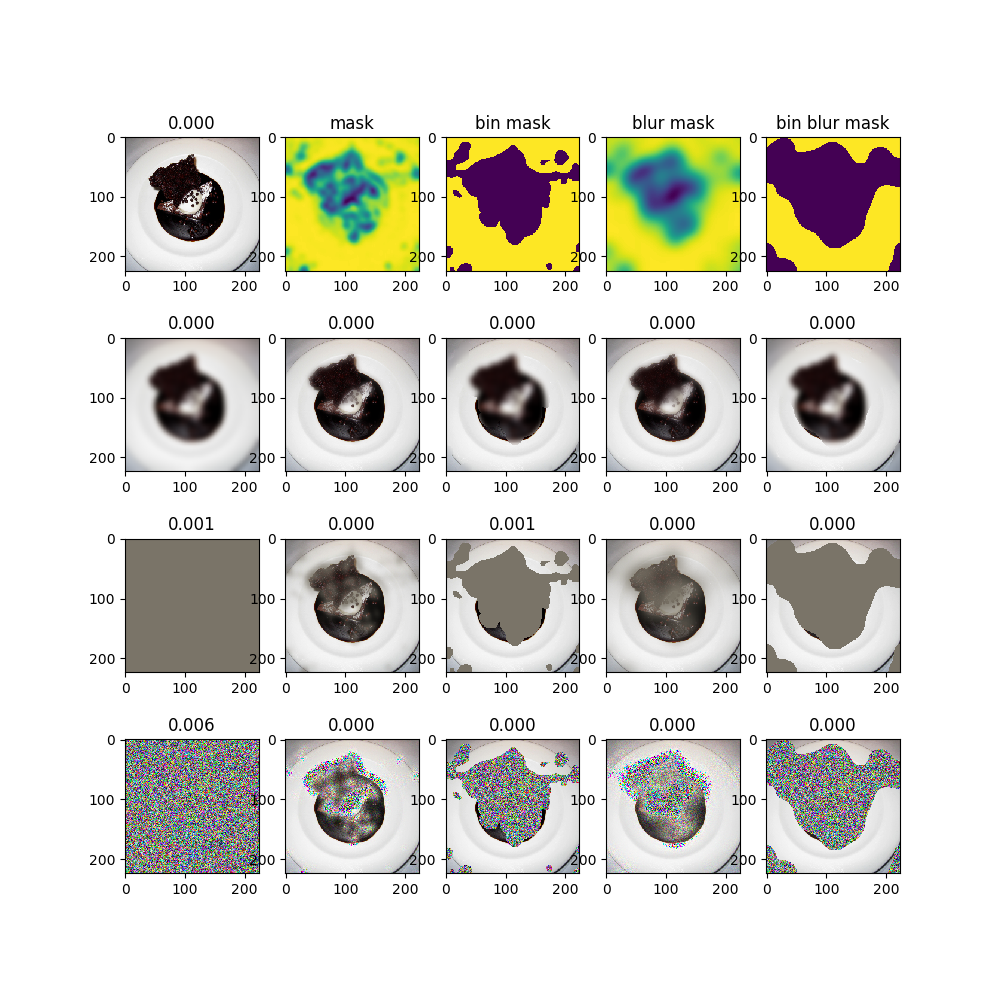

<IPython.core.display.Javascript object>


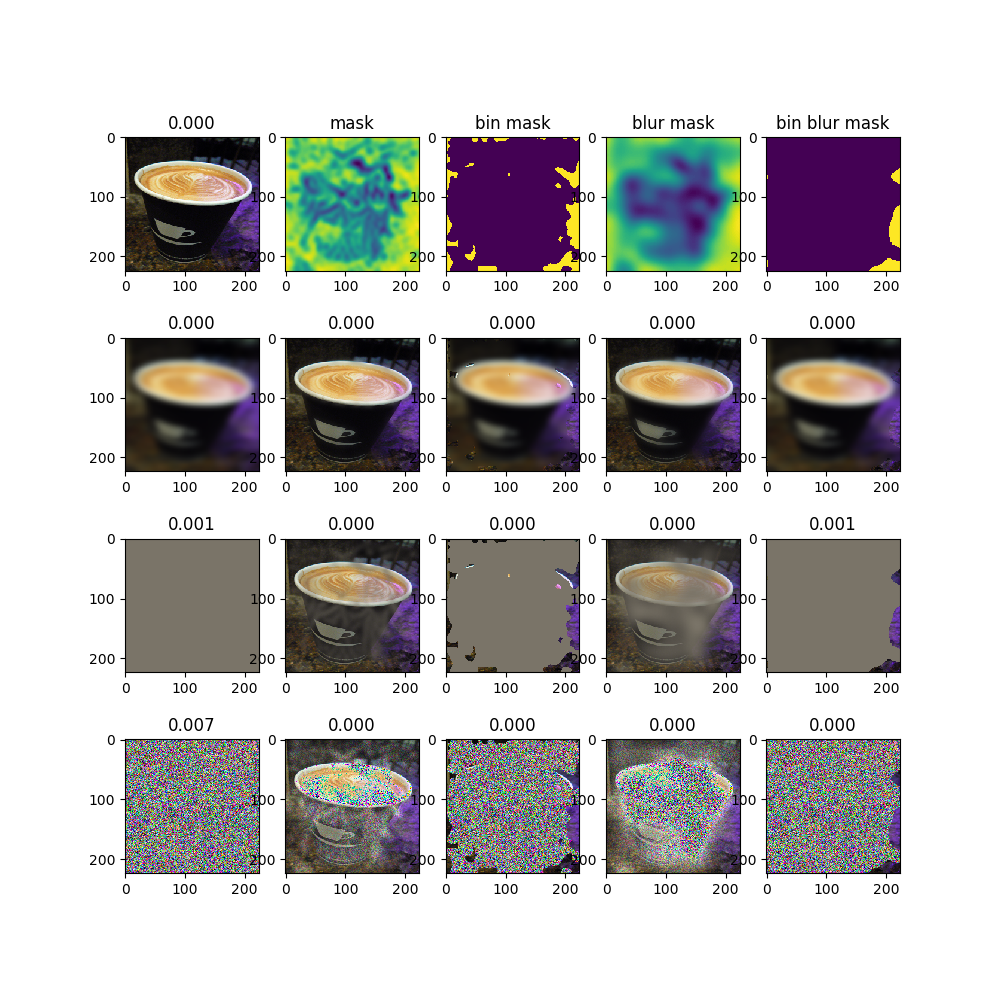

In [13]:
mask_dir = '/data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_avg_blur_blank_noise/lr_-0.12_l1_lambda_-5.00_tv_lambda_-3.00_beta_3.00_blur_mask_4_jitter_4_noise_-3.0_num_iters_500_tv2/'
fig_dir = '/data/ruthfong/neural_coding/sanity_checks/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_avg_blur_blank_noise/lr_-0.12_l1_lambda_-5.00_tv_lambda_-3.00_beta_3.00_blur_mask_4_jitter_4_noise_-3.0_num_iters_500_tv2/'
given_gradient = True
num_top = 5
pylab.rcParams['figure.figsize'] = (10.0,10.0)
transformer = get_ILSVRC_net_transformer(net)
for i in range(10):
    img_path = paths[0]
    mask_path = os.path.join(mask_dir, '%d.npy' % i)
    fig_path = os.path.join(fig_dir, '%d.jpg' % i)
    img = transformer.preprocess('data', caffe.io.load_image(img_path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]
    check_mask_generalizability(net, paths[i], target, mask_path, null_type = 'blur', last_layer = 'prob', fig_path = None)

<IPython.core.display.Javascript object>


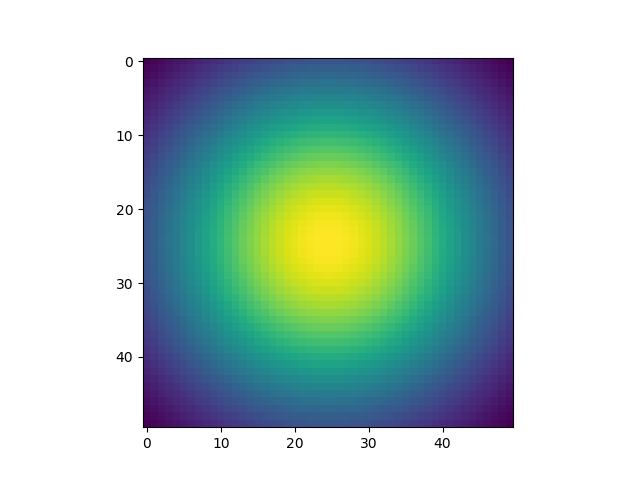

In [8]:
X = np.linspace(-1,1)
Y = np.linspace(-1,1)
XX, YY = np.meshgrid(X, Y, sparse=False, indexing='ij')
sigma = 1
K = np.exp(-(XX**2 + YY**2)/float(sigma**2))
plt.imshow(K)
plt.show()

In [9]:
np.exp(-(np.linspace(0,10)**2)/float(sigma**2))

array([  1.00000000e+00,   9.59206103e-01,   8.46540486e-01,
         6.87396631e-01,   5.13559695e-01,   3.53019205e-01,
         2.23269602e-01,   1.29922608e-01,   6.95606658e-02,
         3.42662513e-02,   1.55307822e-02,   6.47655305e-03,
         2.48495422e-03,   8.77236563e-04,   2.84930489e-04,
         8.51500659e-05,   2.34128844e-05,   5.92309527e-06,
         1.37868923e-06,   2.95262243e-07,   5.81799459e-08,
         1.05478168e-08,   1.75944505e-09,   2.70030429e-10,
         3.81305940e-11,   4.95402622e-12,   5.92197948e-13,
         6.51327421e-14,   6.59106649e-15,   6.13671409e-16,
         5.25702393e-17,   4.14350516e-18,   3.00482844e-19,
         2.00491213e-20,   1.23082093e-21,   6.95213617e-23,
         3.61297980e-24,   1.72757401e-25,   7.60031617e-27,
         3.07645468e-28,   1.14575893e-29,   3.92608635e-31,
         1.23779952e-32,   3.59058025e-34,   9.58302969e-36,
         2.35323281e-37,   5.31680613e-39,   1.10525024e-40,
         2.11394791e-42,

In [ ]:
net_transformer = get_ILSVRC_net_transformer(net)
img = net_transformer.preprocess('data', caffe.io.load_image(paths[0]))
net.blobs['data'].data[...] = img
net.forward()
scores = np.squeeze(net.blobs['prob'].data)
sorted_idx = np.argsort(scores)
num_top = 5
gradient = np.zeros(scores.shape)
gradient[sorted_idx[:-(num_top+1):-1]] = 1
net.blobs['prob'].diff[...] = gradient
net.backward()

In [ ]:
img = caffe.io.load_image(paths[0]) 
net_shape = net.blobs['data'].data.shape
print net_shape
transformer = get_ILSVRC_net_transformer(net)
img_ = transformer.preprocess('data', img)
img_ = img_.reshape(net_shape)
print img_.shape
print np.concatenate((img_,img_,img_)).shape

In [ ]:
mask = np.random.rand(224,224)
blur_mask = blur(mask)
f, ax = plt.subplots(1,2)
ax[0].imshow(mask)
ax[1].imshow(blur_mask)

/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in log10
/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log10
/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in log10
/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


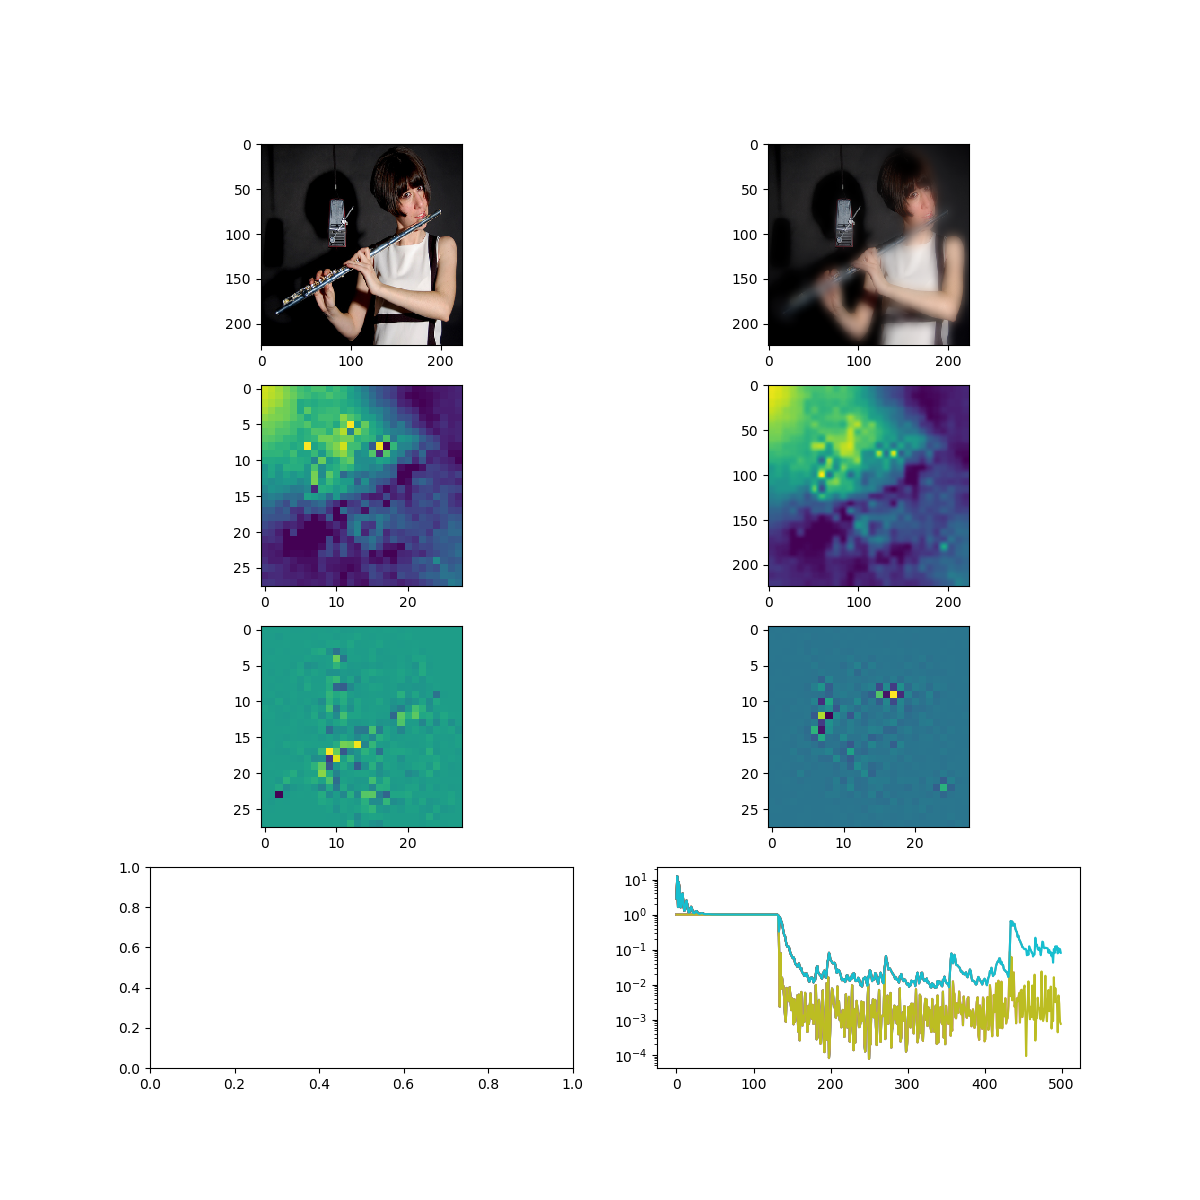

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_blur/lr_0.00_l1_lambda_nan_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_2_jitter_4_noise_-inf_num_iters_500_tv2/7.npy


<IPython.core.display.Javascript object>


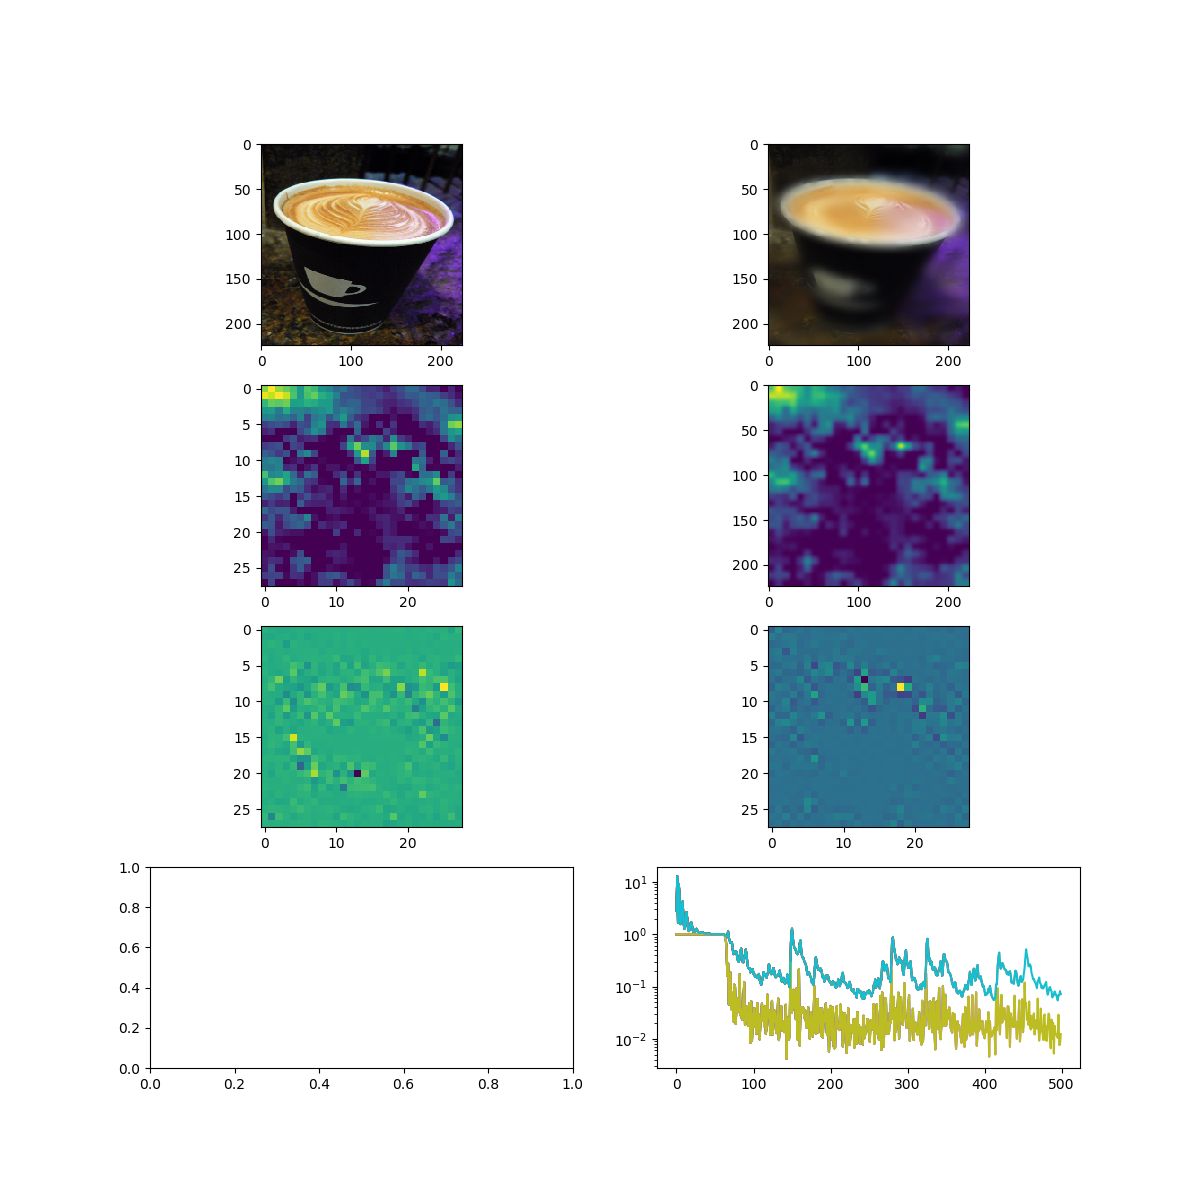

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_blur/lr_0.00_l1_lambda_nan_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_2_jitter_4_noise_-inf_num_iters_500_tv2/9.npy


<IPython.core.display.Javascript object>


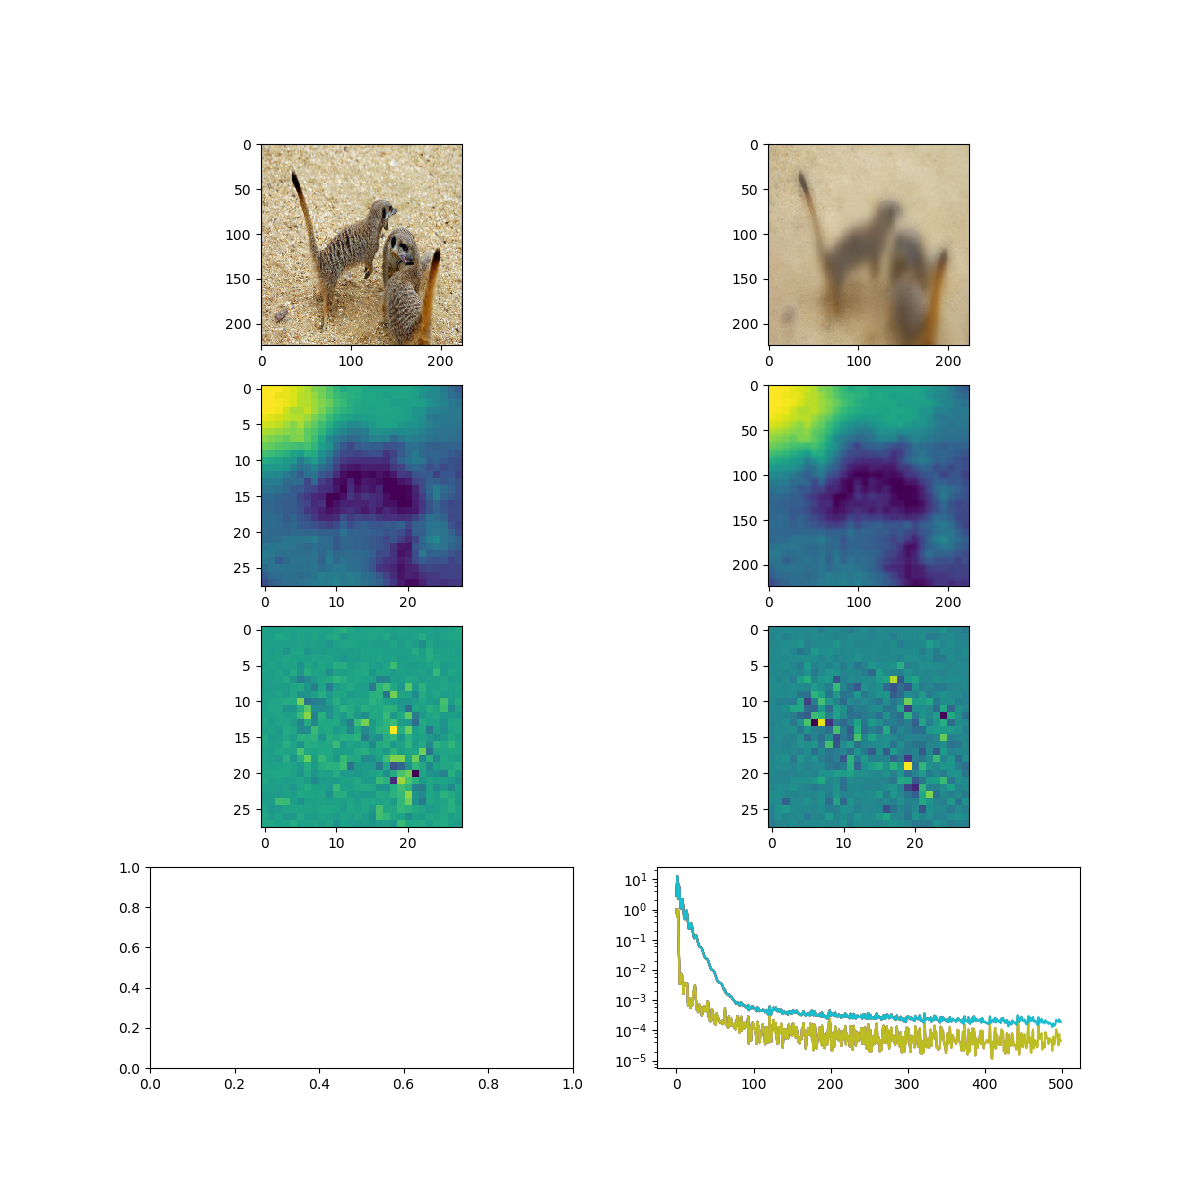

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_blur/lr_0.00_l1_lambda_nan_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_2_jitter_4_noise_-inf_num_iters_500_tv2/6.npy


In [50]:
num_iters = 500
lr = 1e0
l1_lambda = 1-4 #1e-5
l1_ideal = 1
l1_lambda_2 = 0
tv_lambda = 1e-2 #1e-3
tv_beta = 3
jitter = 4
num_top = 5
noise = 0
null_type = 'blur'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 2
mask_scale = 8

for i in [7,9,6]:
    net = get_net(net_type)
    net_transformer = get_ILSVRC_net_transformer(net)

    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = None
    mask_path = None

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_prob_%s/lr_%.2f_l1_lambda_%.2f_l1_lambda2_%.2f_tv_lambda_%.2f_beta_%.2f_mask_scale_%d_blur_mask_%d_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
                net_type, data_desc, int(given_gradient), int(norm_score), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(l1_lambda_2), np.log10(tv_lambda), tv_beta, mask_scale, blur_mask, jitter, np.log10(noise), num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_prob_%s/lr_%.2f_l1_lambda_%.2f_tv_lambda_%.2f_l1_lambda_2_%.2f_beta_%.2f_mask_scale_%d_blur_mask_%d_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
            net_type, data_desc, int(given_gradient), int(norm_score), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(l1_lambda_2), np.log10(tv_lambda), tv_beta, mask_scale, blur_mask, jitter, np.log10(noise), num_iters, i))    
    
    optimize_mask(net, path, target, given_gradient = given_gradient, norm_score = norm_score, 
                      num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, l1_lambda_2 = l1_lambda_2, tv_lambda = tv_lambda, tv_beta = tv_beta, mask_scale = mask_scale,
                      use_conv_norm = use_conv_norm,blur_mask = blur_mask,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = end_layer, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 1e-6
l1_ideal = 1
tv_lambda = 1e-4
tv_beta = 3
jitter = 4
num_top = 5
noise = 1e-3
null_type = 'blur'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 4

for i in [5,6,7,8]:
    net = get_net(net_type)
    net_transformer = get_ILSVRC_net_transformer(net)

    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = None
    mask_path = None
    

    #fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
    #        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    #mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
    #       net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, norm_score = norm_score, 
                      num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta, use_conv_norm = use_conv_norm,
                      blur_mask = blur_mask,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = end_layer, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 1e-4
l1_ideal = 1
tv_lambda = 1e-2
tv_beta = 3
jitter = 4
num_top = 5
noise = 1e-3
null_type = 'blur'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 4

for i in range(10):
    net = get_net(net_type)
    net_transformer = get_ILSVRC_net_transformer(net)

    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = None
    mask_path = None
    

    #fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
    #        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    #mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
    #       net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, norm_score = norm_score, 
                      num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta, use_conv_norm = use_conv_norm,
                      blur_mask = blur_mask,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = end_layer, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 1e-4
l1_ideal = 1
tv_lambda = 1e-2
tv_beta = 3
jitter = 4
num_top = 5
noise = 1e-3
null_type = 'avg_blur_blank_noise'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 4

for i in range(10):
    net = get_net(net_type)
    net_transformer = get_ILSVRC_net_transformer(net)

    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = None
    mask_path = None
    

    #fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
    #        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    #mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
    #       net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, norm_score = norm_score, 
                      num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta, use_conv_norm = use_conv_norm,
                      blur_mask = blur_mask,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = end_layer, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 3
jitter = 4
num_top = 5
noise = 1e-3
null_type = 'avg_blur_blank_noise'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 3

for i in range(10):
    net = get_net(net_type)
    net_transformer = get_ILSVRC_net_transformer(net)

    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = None
    mask_path = None
    

    #fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
    #        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    #mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
    #       net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, norm_score = norm_score, 
                      num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta, use_conv_norm = use_conv_norm,
                      blur_mask = blur_mask,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = end_layer, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 3
jitter = 4
num_top = 5
noise = 1e-3
null_type = 'avg_blur_blank_noise'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 2

for i in range(10):
    net = get_net(net_type)
    net_transformer = get_ILSVRC_net_transformer(net)

    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = None
    mask_path = None
    

    #fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
    #        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    #mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
    #       net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, norm_score = norm_score, 
                      num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta, use_conv_norm = use_conv_norm,
                      blur_mask = blur_mask,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = end_layer, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
from caffe import layers as L, params as P

# our version of LeNet: a series of linear and simple nonlinear transformations
n = caffe.NetSpec()

n.data = L.Data(batch_size=1)
n.conv1 = L.Convolution(n.data, kernel_size=3, num_output=1, weight_filler=dict(type='xavier'))

print n.to_proto()

f = open('conv_kernel_3.prototxt', 'w')
f.write(str(n.to_proto()))
f.close()

net = caffe.Net('conv_kernel_3.prototxt', caffe.TEST)

In [ ]:
conv_net = caffe.Net('conv.prototxt', caffe.TEST)
transformer = get_ILSVRC_net_transformer(net)
mask = np.random.rand(224,224)
img = imresize(caffe.io.load_image(paths[5]), (224,224))/float(255)
mask = img.mean(2)
print conv_net.params['conv'][0].data.shape, conv_net.params['conv'][1].data.shape
weights = np.ones(conv_net.params['conv'][0].data.shape)*1/float(5**2-1)
weights[0,:,5/2,5/2] = -1
conv_net.params['conv'][0].data[...] = weights
conv_net.blobs['data'].data[...] = mask
conv_net.forward()
output = conv_net.blobs['conv'].data
conv_grad = np.ones(conv_net.blobs['conv'].data.shape)
conv_net.blobs['conv'].diff[...] = output
conv_net.backward()
print conv_net.blobs['conv'].diff.shape
diff = conv_net.blobs['data'].diff
print diff.max(), diff.min()
norm_diff = np.squeeze(np.transpose((diff - diff.min())/float(diff.max() - diff.min())))
print norm_diff.min(), norm_diff.max()
f, ax = plt.subplots(2,2)
ax[0,0].imshow(mask)
#ax[0,1].imshow(np.squeeze(np.transpose(diff)))
ax[0,1].imshow(np.squeeze(diff))
#ax[0,1].imshow(norm_diff)


In [ ]:
num_iters = 1000
lr = 1e-0
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 3
jitter = 8
num_top = 5
noise = 1e-3
null_type = 'blur'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = True
net_transformer = get_ILSVRC_net_transformer(net)

for i in [5]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = None
    mask_path = None
    #fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
    #        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    #mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
    #       net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, norm_score = norm_score, 
                      num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta, use_conv_norm = use_conv_norm,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = end_layer, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 1000
lr = 1e-2
l1_lambda = 1e-2
l1_ideal = 1
tv_lambda = 5e-0
tv_beta = 3
jitter = 8
num_top = 5
noise = 1e-3
null_type = 'blur'
given_gradient = True
norm_score = True
end_layer = 'loss3/classifier'
net_transformer = get_ILSVRC_net_transformer(net)

for i in [5]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
            net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
            net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, norm_score = norm_score, 
                      num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = end_layer, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
import optimize_mask
reload(optimize_mask)
from optimize_mask import *

num_iters = 300
lr = 1e-0
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 3
jitter = 8
num_top = 5
noise = 1e-3
null_type = 'blur'
given_gradient = False

net_transformer = get_ILSVRC_net_transformer(net)

for i in [1,2]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, np.log10(noise), num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, noise = noise, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e0
l1_lambda = 1e-4
l1_ideal = 1
tv_lambda = 1e-2
tv_beta = 3
jitter = 8
num_top = 5
null_type = 'blur'

net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    target_idx = sorted_idx[:-(num_top+1):-1]
    #gradient = np.zeros(scores.shape)
    #gradient[sorted_idx[:-(num_top+1):-1]] = 1

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_output_grad/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_output_grad/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target_idx, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e0
l1_lambda = 1e-6
l1_ideal = 1
tv_lambda = 1e-4
tv_beta = 3
jitter = 8
num_top = 5
null_type = 'blur'

net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    target_idx = sorted_idx[:-(num_top+1):-1]
    #gradient = np.zeros(scores.shape)
    #gradient[sorted_idx[:-(num_top+1):-1]] = 1

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_output_grad/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_output_grad/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target_idx, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e0
l1_lambda = 1e-7
l1_ideal = 1
tv_lambda = 1e-5
tv_beta = 2
jitter = 4
num_top = 5
null_type = 'blur'

net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    target_idx = sorted_idx[:-(num_top+1):-1]
    #gradient = np.zeros(scores.shape)
    #gradient[sorted_idx[:-(num_top+1):-1]] = 1

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_output_grad/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_output_grad/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target_idx, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e0
l1_lambda = 5e-8
l1_ideal = 1
tv_lambda = 5e-6
tv_beta = 1.5
jitter = 2
num_top = 5
null_type = 'blur'
given_gradient = True
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e0
l1_lambda = 5e-8
l1_ideal = 1
tv_lambda = 5e-6
tv_beta = 2
jitter = 2
num_top = 5
null_type = 'blur'
given_gradient = True
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e0
l1_lambda = 5e-8
l1_ideal = 1
tv_lambda = 5e-6
tv_beta = 2
jitter = 2
num_top = 5
null_type = 'blur'
given_gradient = True
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d_tv2/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d_tv2/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e0
l1_lambda = 5e-8
l1_ideal = 1
tv_lambda = 5e-6
tv_beta = 2
jitter = 2
num_top = 5
null_type = 'blur'
given_gradient = False
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%d_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, lr, np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 5e-8
l1_ideal = 1
tv_lambda = 5e-6
tv_beta = 2
jitter = 2
num_top = 5
null_type = 'blur'
given_gradient = False
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 1e-6
l1_ideal = 1
tv_lambda = 1e-4
tv_beta = 2
jitter = 4
num_top = 5
null_type = 'blur'
given_gradient = False
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 1e-6
l1_ideal = 1
tv_lambda = 1e-4
tv_beta = 2
jitter = 4
num_top = 5
null_type = 'blur'
given_gradient = True
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
num_iters = 500
lr = 1e-1
l1_lambda = 1e-6
l1_ideal = 1
tv_lambda = 1e-4
tv_beta = 3
jitter = 8
num_top = 5
null_type = 'blur'
given_gradient = True
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
import optimize_mask
reload(optimize_mask)
from optimize_mask import *

num_iters = 500
lr = 1e-1
l1_lambda = 1e-6
l1_ideal = 1
tv_lambda = 1e-4
tv_beta = 3
jitter = 8
num_top = 5
null_type = 'blur'
given_gradient = True
net_transformer = get_ILSVRC_net_transformer(net)

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        target = sorted_idx[:-(num_top+1):-1]

    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.png' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d/min_top%d_prob_%s/lr_%.1f_l1_lambda_%.2f_tv_lambda_%.2f_beta_%.2f_jitter_%d_num_iters_%d/%d.npy' % (
            net_type, data_desc, int(given_gradient), num_top, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(tv_lambda), tv_beta, jitter, num_iters, i))
    optimize_mask(net, path, target, given_gradient = given_gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda,
                      l1_ideal = l1_ideal, tv_lambda = tv_lambda, tv_beta = tv_beta,
                      jitter = jitter, null_type = null_type, gpu = gpu, start_layer = None,
                      end_layer = None, plot_step = 50, debug = False,
                      fig_path = fig_path, mask_path = mask_path)

In [ ]:
#net_shape = net.blobs['data'].data.shape
#net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

lr = 1e0
l1_lambda = 5e-8
l1_ideal = 1
tv_lambda = 5e-6
tv_beta = 1.5
jitter = 2

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = 500, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net_shape = net.blobs['data'].data.shape
net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

lr = 1e0
l1_lambda = 1e-6
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 2
jitter = 2

for i in [0,1,3,5,9]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = 500, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net_shape = net.blobs['data'].data.shape
net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

lr = 1e0
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 3
jitter = 2

for i in [0,1,3,5,9]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = 500, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net_shape = net.blobs['data'].data.shape
net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

lr = 1e0
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 2.5
jitter = 4

for i in [0,1,3,5,9]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = 500, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net_shape = net.blobs['data'].data.shape
net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

lr = 1e0
l1_lambda = 1e-4
l1_ideal = 1
tv_lambda = 1e-2
tv_beta = 2.5
jitter = 6

for i in [0,1,3,5,9]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = 500, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net_shape = net.blobs['data'].data.shape
net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

lr = 1e0
l1_lambda = 1e-4
l1_ideal = 1
tv_lambda = 1e-2
tv_beta = 3
jitter = 8

for i in [0,1,3,5,9]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = 500, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net_shape = net.blobs['data'].data.shape
net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

lr = 1e0
l1_lambda = 1e-4
l1_ideal = 1
tv_lambda = 1e-2
tv_beta = 3
jitter = 8

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = 500, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net = get_net('googlenet')
#net_shape = net.blobs['data'].data.shape
#net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

num_iters = 300
lr = 1e0
l1_lambda = 1e-4
l1_ideal = 1
tv_lambda = 1e-2
tv_beta = 3
jitter = 8

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net = get_net('googlenet')
#net_shape = net.blobs['data'].data.shape
#net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

num_iters = 300
lr = 1e0
l1_lambda = 1e-4
l1_ideal = 1
tv_lambda = 1e-2
tv_beta = 3
jitter = 8

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    num_top = 5
    gradient = np.zeros(scores.shape)
    gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, gradient, num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net = get_net('googlenet')
#net_shape = net.blobs['data'].data.shape
#net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

num_iters = 200
lr = 1e0
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 3
jitter = 8

num_top = 5

for i in [6,7,9,13,14,16,22]:
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    print scores[sorted_idx[:-(num_top+1):-1]]
    #gradient = np.zeros(scores.shape)
    #gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, sorted_idx[:-(num_top+1):-1], num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net = get_net('googlenet')
#net_shape = net.blobs['data'].data.shape
#net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

num_iters = 200
lr = 1e0
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 3
jitter = 8

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    print scores[sorted_idx[:-(num_top+1):-1]]
    num_top = 5
    #gradient = np.zeros(scores.shape)
    #gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, sorted_idx[:-(num_top+1):-1], num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net = get_net('googlenet')
#net_shape = net.blobs['data'].data.shape
#net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

num_iters = 300
lr = 1e0
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 2.5e-3
tv_beta = 3
jitter = 8

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    print scores[sorted_idx[:-(num_top+1):-1]]
    num_top = 5
    #gradient = np.zeros(scores.shape)
    #gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, sorted_idx[:-(num_top+1):-1], num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)

In [ ]:
net = get_net('googlenet')
#net_shape = net.blobs['data'].data.shape
#net.blobs['data'].reshape(1,3,net_shape[2],net_shape[3])
net_transformer = get_ILSVRC_net_transformer(net)

num_iters = 400
lr = 1e0
l1_lambda = 1e-5
l1_ideal = 1
tv_lambda = 1e-3
tv_beta = 3
jitter = 10

for i in range(10):
    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    print scores[sorted_idx[:-(num_top+1):-1]]
    num_top = 5
    #gradient = np.zeros(scores.shape)
    #gradient[sorted_idx[:-(num_top+1):-1]] = 1

    mask = optimize_mask(net, path, sorted_idx[:-(num_top+1):-1], num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1, 
                         tv_lambda = tv_lambda, tv_beta = tv_beta, jitter = jitter, null_type = 'blur', 
                         gpu = gpu, start_layer = None, end_layer = None, plot_step = 50, debug = False)